<a href="https://colab.research.google.com/github/ashishgir/Auto-Car-Data-Mining/blob/master/climatepython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Upload the kaggle.json first then run the cells below**

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!pip install -q kaggle

In [3]:
! kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

 90% 76.0M/84.7M [00:00<00:00, 88.6MB/s]
100% 84.7M/84.7M [00:00<00:00, 124MB/s] 


In [4]:
! unzip climate-change-earth-surface-temperature-data.zip

Archive:  climate-change-earth-surface-temperature-data.zip
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  


In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
!pip install pandas==0.22

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756034 sha256=f26eea7145427b875c96fd59799116b729e9e50818d7216927b40e20f5cee074
  Stored in directory: /tmp/pip-ephem-wheel-cache-0b7mljmt/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


**Global warming is a hot topic these days. Debate over global warming has been going all around the world. Temperature visualization is one of the most important arguments in conversations so it's time to plot some data**


In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# using Basemap for map visualization. Installed it with "conda install basemap"
from mpl_toolkits.basemap import Basemap
from matplotlib import animation, rc
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [5]:
globaltemp = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])
globaltemp.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


**Let's look how average temperature changes over the years:**


Text(0.5, 0, 'year')

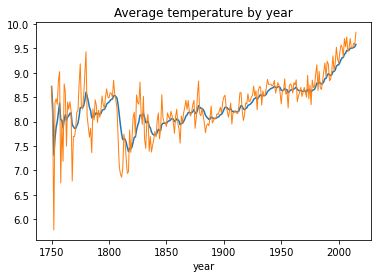

In [6]:
year_temp = globaltemp.groupby(globaltemp.dt.dt.year).mean()
pd.stats.moments.ewma(year_temp.LandAverageTemperature, 5).plot()
year_temp.LandAverageTemperature.plot(linewidth=1)
plt.title('Average temperature by year')
plt.xlabel('year')

**There is clearly an upward trend in the Earth's temperature over the last 150 years. But what if this increase is caused by warming only in underpopulated places like Antarctica or Siberia? Let's examine such graphs for some cities!**


In [7]:
bycities = pd.read_csv('GlobalLandTemperaturesByCity.csv', parse_dates=['dt'])
# there are some cities with the same name but in different countries 
bycities[['City', 'Country']].drop_duplicates()
bycities.City = bycities.City.str.cat(bycities.Country, sep=' ')
bycities = bycities[bycities.dt.dt.year >= 1900]
bycities.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1874,1900-01-01,-0.989,0.588,Århus Denmark,Denmark,57.05N,10.33E
1875,1900-02-01,-2.799,0.882,Århus Denmark,Denmark,57.05N,10.33E
1876,1900-03-01,0.592,0.429,Århus Denmark,Denmark,57.05N,10.33E
1877,1900-04-01,4.630,0.417,Århus Denmark,Denmark,57.05N,10.33E
1878,1900-05-01,9.576,0.521,Århus Denmark,Denmark,57.05N,10.33E


convert to a city-year table calculating mean year temperature:



In [8]:
city_means = bycities.groupby(['City', bycities.dt.dt.year])['AverageTemperature'].mean().unstack()
city_mins = bycities.groupby(['City', bycities.dt.dt.year])['AverageTemperature'].min().unstack()
city_maxs = bycities.groupby(['City', bycities.dt.dt.year])['AverageTemperature'].max().unstack()
city_means.head()


dt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
City,,,,,,,,,,,,,,,,,,,,,
A Coruña Spain,13.267917,12.773417,12.828333,13.028167,13.349083,12.688000,13.107333,12.900583,13.235250,12.694667,...,13.928500,13.977667,14.540917,13.806167,13.682333,14.076167,13.946500,14.585500,13.625667,13.983750
Aachen Germany,9.132500,8.339750,8.133583,8.994000,8.987333,8.571083,8.877917,8.479833,8.108750,7.979000,...,9.657917,10.046333,10.471667,10.551833,9.863083,9.993750,8.703750,10.654667,9.788500,9.531500
Aalborg Denmark,7.375250,7.875667,6.542667,7.830833,7.577083,7.808917,8.229000,7.273000,7.796667,6.878167,...,8.919000,8.952333,9.514750,9.528583,9.628000,8.938667,6.965000,9.181167,8.399833,8.497625
Aba Nigeria,26.418833,26.455333,26.001750,25.875917,25.342083,26.315250,26.145000,26.029000,26.117500,26.082250,...,27.427333,27.422167,27.551083,27.551583,27.351583,27.631167,27.696667,27.388083,27.253500,27.513625
Abadan Iran,25.016167,25.770750,25.459083,24.242750,24.777750,24.393500,24.314667,23.778750,24.683250,25.284333,...,26.108583,25.901083,26.278583,26.281833,26.216917,26.392083,27.592833,26.019833,26.607833,27.095625


In order to normalize cities temperatures we shift them by the mean temperature for the first 5 years. (we dont just subtract first year temperature because it can be an anomalously hot/cold year)



Text(0.5, 1.0, "Year's max temperature increase for random cities")

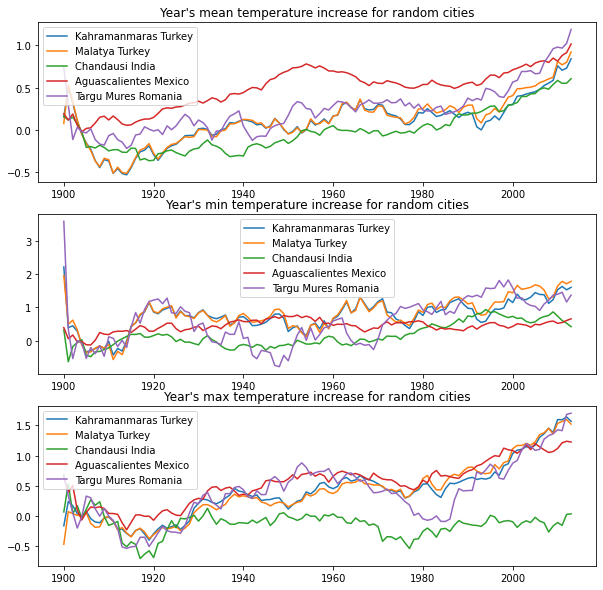

In [0]:
first_years_mean = city_means.iloc[:, :5].mean(axis=1) # mean temperature for the first 5 years
city_means_shifted = city_means.subtract(first_years_mean, axis=0)

def plot_temps(cities, city_ser, ax):
    first_years_mean = city_ser.iloc[:, :5].mean(axis=1)
    city_ser = city_ser.subtract(first_years_mean, axis=0)
    for city in random_cities:
        row = city_ser.loc[city]
        pd.stats.moments.ewma(row, 10).plot(label=row.name, ax=ax)
    ax.set_xlabel('')
    ax.legend(loc='best')

fig, axes = plt.subplots(3,1, figsize=(10,10))

n = 5
random_cities = city_means_shifted.sample(n).index

plot_temps(random_cities, city_means, axes[0])
plot_temps(random_cities, city_mins, axes[1])
plot_temps(random_cities, city_maxs, axes[2])

axes[0].set_title("Year's mean temperature increase for random cities")
axes[1].set_title("Year's min temperature increase for random cities")
axes[2].set_title("Year's max temperature increase for random cities")


Year's mean temperatures tend to grow over the years but we can't say for sure that it applies to max and min temperatures


**GLOBAL WARMING animation**


In [0]:
cities_info = bycities.groupby(['City']).first()
cities_info.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude
City,,,,,,
A Coruña Spain,1900-01-01,8.089,0.655,Spain,42.59N,8.73W
Aachen Germany,1900-01-01,2.079,0.545,Germany,50.63N,6.34E
Aalborg Denmark,1900-01-01,-0.989,0.588,Denmark,57.05N,10.33E
Aba Nigeria,1900-01-01,25.722,0.892,Nigeria,5.63N,8.07E
Abadan Iran,1900-01-01,11.636,1.253,Iran,29.74N,48.00E


How to understand markers:
marker color shows if this year temperature is close to a record one for the city (dark blue for coldest temperatures, dark red for highest temperatures)
marker size represents absolute difference between city median temperature and current year temperature



In [0]:
def get_temp_markers(city_names, year):
    points = np.zeros(len(city_names), dtype=[('lon', float, 1),
                                      ('lat', float, 1),
                                      ('size',     float, 1),
                                      ('color',    float, 1)])
    cmap = plt.get_cmap('coolwarm')
    
    for i, city in enumerate(city_names):
        city_temps = city_means.loc[city]
        _MIN, _MAX, _MEDIAN = city_temps.min(), city_temps.max(), city_temps.median()
        temp = city_temps.loc[year]
        
        coords = cities_info.loc[city][['Latitude', 'Longitude']].values
        lat = float(coords[0][:-1]) * (-1 if coords[0][-1] == 'S' else 1)
        lon = float(coords[1][:-1]) * (-1 if coords[1][-1] == 'W' else 1)
        
        points['lat'][i] = lat
        points['lon'][i] = lon
        points['size'][i] = 100 * abs(temp - _MEDIAN)
        points['color'][i] = (temp - _MIN) / (_MAX - _MIN)
            
    return points   


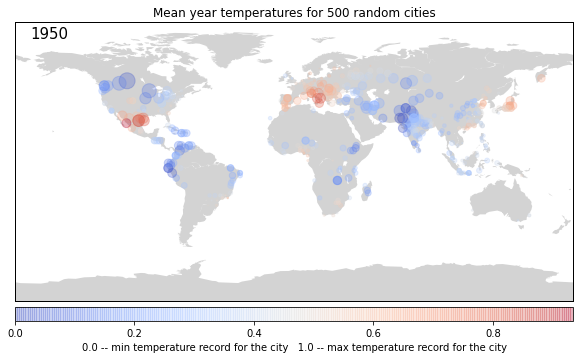

In [0]:
fig = plt.figure(figsize=(10, 10))
cmap = plt.get_cmap('coolwarm')

map = Basemap(projection='cyl')
map.drawmapboundary()
map.fillcontinents(color='lightgray', zorder=1)

START_YEAR = 1950
LAST_YEAR = 2013

n_cities = 500
random_cities = city_means.sample(n_cities).index
year_text = plt.text(-170, 80, str(START_YEAR),fontsize=15)

temp_markers = get_temp_markers(random_cities, START_YEAR)
xs, ys = map(temp_markers['lon'], temp_markers['lat'])
scat = map.scatter(xs, ys, s=temp_markers['size'], c=temp_markers['color'], cmap=cmap, marker='o', 
                   alpha=0.3, zorder=10)

def init():
  return scat,

def update(frame_number):
    current_year = START_YEAR + (frame_number % (LAST_YEAR - START_YEAR + 1))
    year_text.set_text(str(current_year))

    temp_markers = get_temp_markers(random_cities, current_year)
    xs, ys = map(temp_markers['lon'], temp_markers['lat'])
    #print(temp_markers['color'][0:9])
    #scat.set_offsets(np.dstack((xs, ys)))
    scat.set_color(cmap(temp_markers['color']))
    scat.set_sizes(temp_markers['size'])
    return scat,    

# # # Construct the animation, using the update function as the animation
# # # director.
ani = animation.FuncAnimation(fig, update, init_func=init, interval=500, frames=LAST_YEAR - START_YEAR + 1, blit=True)

cbar = map.colorbar(scat, location='bottom')
cbar.set_label('0.0 -- min temperature record for the city   1.0 -- max temperature record for the city')
plt.title('Mean year temperatures for {} random cities'.format(n_cities))
plt.show()


In [0]:
from IPython.display import HTML
HTML(ani.to_html5_video())

**GIF shows that the redness of the picture increases as the planet is slowly warming. 2013 year turns to be bright red, that means there were a lot of high temperature records. Global warming confirmed.**